# 4.1

4.1.1

4.1.1(a)

In [289]:
import numpy as np
import matplotlib.pyplot as plt

In [290]:
class class_same:
    a_mean=np.array([8,-1])
    b_mean=np.array([-2,3])
    a_cov=np.array([[1,0],
      [0,10]])
    b_cov=np.array([[1,0],
      [0,10]])
    n_a=2000
    n_b=1000
    a=np.random.multivariate_normal(a_mean,a_cov,n_a)
    b=np.random.multivariate_normal(b_mean,b_cov,n_b)
    a=a.T
    b=b.T
    a1=a[0,:]
    a2=a[1,:]
    b1=b[0,:]
    b2=b[1,:]

In [291]:
class class_no_same:
    a_mean=np.array([8,-1])
    b_mean=np.array([-2,3])
    a_cov=np.array([[10,0],
      [0,20]])
    b_cov=np.array([[3,0],
      [0,15]])
    n_a=2000
    n_b=1000
    a=np.random.multivariate_normal(a_mean,a_cov,n_a)
    b=np.random.multivariate_normal(b_mean,b_cov,n_b)
    a=a.T
    b=b.T
    a1=a[0,:]
    a2=a[1,:]
    b1=b[0,:]
    b2=b[1,:]

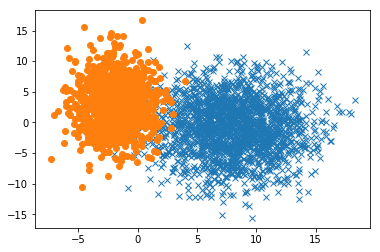

In [292]:
plt.plot(class_no_same.a1,class_no_same.a2,'x',class_no_same.b1,class_no_same.b2,'o')

In [293]:
w1=np.array([1,1])
w2=np.array([1,0.5])
w3=np.array([1,2])
w4=np.array([-5,5])

In [294]:
from sklearn.preprocessing import normalize
w1_norm = w1/ np.linalg.norm(w1)
w2_norm = w2/ np.linalg.norm(w2)
w3_norm = w3/ np.linalg.norm(w3)
w4_norm = w4/ np.linalg.norm(w4)
print ('random direction w choice\nw1 is',w1_norm,'\nw2 is',w2_norm,
       '\nw3 is',w3_norm,'\nw4 is',w4_norm)

random direction w choice
w1 is [0.70710678 0.70710678] 
w2 is [0.89442719 0.4472136 ] 
w3 is [0.4472136  0.89442719] 
w4 is [-0.70710678  0.70710678]


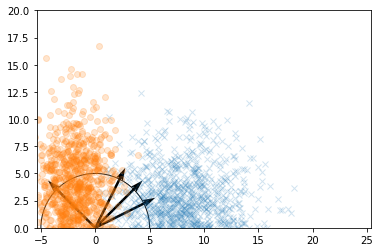

In [295]:
V=np.array([[w1_norm],[w2_norm],[w3_norm],[w4_norm]])
V=5*(V.T)

fig, ax = plt.subplots()
ax.set_xlim((0, 20))
ax.set_ylim((0, 20))
ax.plot(class_no_same.a1,class_no_same.a2,'x',class_no_same.b1,class_no_same.b2,'o',alpha=0.2)
origin = [0], [0] # origin point
plt.quiver(*origin, V[0], V[1], color=['black','black','black'],scale=25)
ax.add_patch(plt.Circle((0, 0), 5, fill=False,edgecolor='black', alpha=10))
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   
plt.show()

In [296]:
def projection(w,classes):
    classes_list=[]
    for i in range(len(classes.T)):
        classes_proj=np.dot((w).T,(classes.T)[i])
        classes_list.append(classes_proj) 
    return classes_list

In [297]:
import matplotlib.mlab as mlab

Text(0.5,1,'the other dimension  in 2 class')

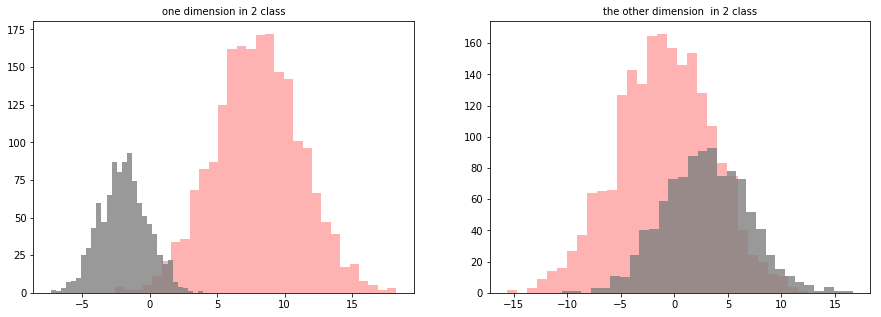

In [298]:
fig,ax=plt.subplots(figsize=(15,5),nrows=1,ncols=2)
ax[0].hist(class_no_same.a[0,:],bins=30,color='r',alpha=0.3)
ax[0].hist(class_no_same.b[0,:],bins=30,color='grey',alpha=0.8)
ax[0].set_title('one dimension in 2 class',fontsize=10)
ax[1].hist(class_no_same.a[1,:],bins=30,color='r',alpha=0.3)
ax[1].hist(class_no_same.b[1,:],bins=30,color='grey',alpha=0.8)
ax[1].set_title('the other dimension  in 2 class',fontsize=10)

Text(0.5,0,'w4 projection')

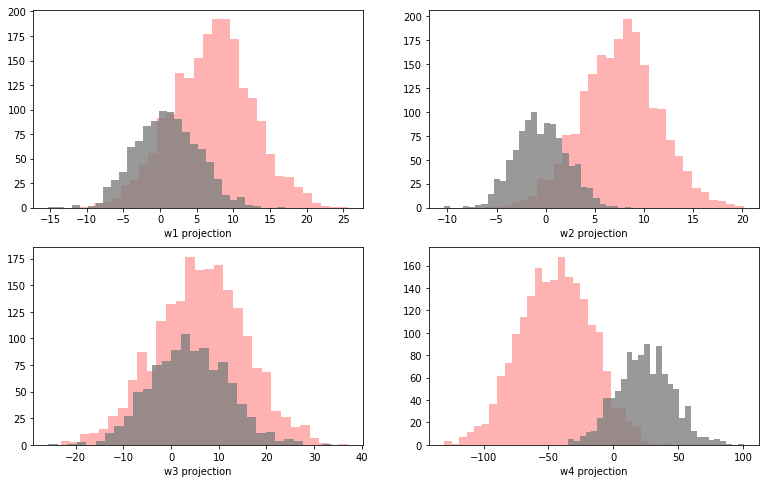

In [299]:
fig,ax=plt.subplots(figsize=(13,8),nrows=2,ncols=2)
ax[0,0].hist(projection(w1,class_no_same.a),bins=30,color='r',alpha=0.3)
ax[0,0].hist(projection(w1,class_no_same.b),bins=30,color='grey',alpha=0.8)
ax[0,0].set_xlabel('w1 projection',fontsize=10)

ax[0,1].hist(projection(w2,class_no_same.a),bins=30,color='r',alpha=0.3)
ax[0,1].hist(projection(w2,class_no_same.b),bins=30,color='grey',alpha=0.8)
ax[0,1].set_xlabel('w2 projection',fontsize=10)

ax[1,0].hist(projection(w3,class_no_same.a),bins=30,color='r',alpha=0.3)
ax[1,0].hist(projection(w3,class_no_same.b),bins=30,color='grey',alpha=0.8)
ax[1,0].set_xlabel('w3 projection',fontsize=10)

ax[1,1].hist(projection(w4,class_no_same.a),bins=30,color='r',alpha=0.3)
ax[1,1].hist(projection(w4,class_no_same.b),bins=30,color='grey',alpha=0.8)
ax[1,1].set_xlabel('w4 projection',fontsize=10)

4.1.1.b

In [300]:
import math

In [301]:
def rotation(theta):
    c,s=np.cos(theta),np.sin(theta)
    R=np.matrix('{} {}; {} {}'.format(c, -s, s, c))
    return R

In [302]:
w1_norm.shape

(2,)

In [303]:
# SB=np.dot((a_mean-b_mean),(a_mean-b_mean).T)
# SW_a=np.dot((a-a_mean),(a-a_mean).T)
# SW_b=np.dot((b-b_mean),(b-b_mean).T)

# def Fisher_function(w):
#     F=np.dot((np.dot(w,(SB))),(w.T))/np.dot((np.dot(w,(SW))),(w.T))
#     return F


In [304]:
def mu(x,w,n):
    mu=0
    for i in range(0,n):
        mu+=(1/n)*(x.T[i].dot(w))
    return mu
# mu_a=0
# mu_b=0
# for i in range(0,n_a):
#     mu_a+=(1/n_a)*(a.T[i].dot(w4))
# for j in range(0,n_b):
#     mu_b+=(1/n_b)*(b.T[j].dot(w4))

In [305]:
def var(x,w,n):
    var=0
    mu_now=mu(x,w,n)
    for i in range(0,n):
        var+=(1/n)*((x.T[i].dot(w)-mu_now)**2)
    return var
# var_a=0
# var_b=0
# for i in range(0,n_a):
#     var_a+=(1/n_a)*((a.T[i].dot(w4)-mu_a)**2)
# for j in range(0,n_b):
#     var_b+=(1/n_b)*((b.T[j].dot(w4)-mu_b)**2)

In [306]:
def fisher_function(w,a_num,b_num):
    f=((mu(class_no_same.a,w,a_num)-mu(class_no_same.b,w,b_num))**2)/(((a_num/(a_num+b_num))*var(class_no_same.a,w,a_num)))+(((b_num/(a_num+b_num))*var(class_no_same.b,w,b_num)))
    return f

In [307]:
fisher_function(w3,class_no_same.n_a,class_no_same.n_b)

21.555505885799445

In [308]:
fisher_function(w4,class_no_same.n_a,class_no_same.n_b)

161.3334613827286

In [309]:
w_ini=(np.asmatrix(w3_norm)).T
def w(theta):
    return rotation(theta).dot(w_ini)

In [310]:
(np.asarray(w(3))).flatten().shape

(2,)

In [311]:
F_value=[]
angle=[]
for k in range(0,180):
    angle.append(k)
    theta=np.radians(k)
    weight=(np.asarray(w(theta))).flatten()
    F_value.append(fisher_function(weight,class_no_same.n_a,class_no_same.n_b))
    print('Angle theta is',k)
    print('Rotation matrix is \n',rotation(theta))
    print('Vector w is',weight)
    print('The fisher value is',fisher_function(weight,class_no_same.n_a,class_no_same.n_b))

Angle theta is 0
Rotation matrix is 
 [[ 1. -0.]
 [ 0.  1.]]
Vector w is [0.4472136  0.89442719]
The fisher value is 4.385650254334389
Angle theta is 1
Rotation matrix is 
 [[ 0.9998477  -0.01745241]
 [ 0.01745241  0.9998477 ]]
Vector w is [0.43153558 0.90209592]
The fisher value is 4.4107208076347195
Angle theta is 2
Rotation matrix is 
 [[ 0.99939083 -0.0348995 ]
 [ 0.0348995   0.99939083]]
Vector w is [0.41572611 0.90948986]
The fisher value is 4.440318251336432
Angle theta is 3
Rotation matrix is 
 [[ 0.99862953 -0.05233596]
 [ 0.05233596  0.99862953]]
Vector w is [0.39979    0.91660676]
The fisher value is 4.47426356767708
Angle theta is 4
Rotation matrix is 
 [[ 0.99756405 -0.06975647]
 [ 0.06975647  0.99756405]]
Vector w is [0.38373212 0.92344445]
The fisher value is 4.512382555726227
Angle theta is 5
Rotation matrix is 
 [[ 0.9961947  -0.08715574]
 [ 0.08715574  0.9961947 ]]
Vector w is [0.36755735 0.93000086]
The fisher value is 4.554506068577953
Angle theta is 6
Rotation matr

The fisher value is 9.537118646561034
Angle theta is 55
Rotation matrix is 
 [[ 0.57357644 -0.81915204]
 [ 0.81915204  0.57357644]]
Vector w is [-0.47616068  0.87935829]
The fisher value is 9.68534208623763
Angle theta is 56
Rotation matrix is 
 [[ 0.5591929  -0.82903757]
 [ 0.82903757  0.5591929 ]]
Vector w is [-0.49143508  0.87091421]
The fisher value is 9.83559175281859
Angle theta is 57
Rotation matrix is 
 [[ 0.54463904 -0.83867057]
 [ 0.83867057  0.54463904]]
Vector w is [-0.50655978  0.86220484]
The fisher value is 9.987874713999727
Angle theta is 58
Rotation matrix is 
 [[ 0.52991926 -0.8480481 ]
 [ 0.8480481   0.52991926]]
Vector w is [-0.52153018  0.85323284]
The fisher value is 10.142192610714098
Angle theta is 59
Rotation matrix is 
 [[ 0.51503807 -0.8571673 ]
 [ 0.8571673   0.51503807]]
Vector w is [-0.53634171  0.84400093]
The fisher value is 10.298540924274104
Angle theta is 60
Rotation matrix is 
 [[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]
Vector w is [-0.550989

Angle theta is 109
Rotation matrix is 
 [[-0.32556815 -0.94551858]
 [ 0.94551858 -0.32556815]]
Vector w is [-0.99129603  0.13165175]
The fisher value is 16.42325577048617
Angle theta is 110
Rotation matrix is 
 [[-0.34202014 -0.93969262]
 [ 0.93969262 -0.34202014]]
Vector w is [-0.99344269  0.1143312 ]
The fisher value is 16.33672769171622
Angle theta is 111
Rotation matrix is 
 [[-0.35836795 -0.93358043]
 [ 0.93358043 -0.35836795]]
Vector w is [-0.99528674  0.09697582]
The fisher value is 16.235196090217613
Angle theta is 112
Rotation matrix is 
 [[-0.37460659 -0.92718385]
 [ 0.92718385 -0.37460659]]
Vector w is [-0.99682761  0.0795909 ]
The fisher value is 16.118742971485197
Angle theta is 113
Rotation matrix is 
 [[-0.39073113 -0.92050485]
 [ 0.92050485 -0.39073113]]
Vector w is [-0.99806484  0.06218174]
The fisher value is 15.987526710638901
Angle theta is 114
Rotation matrix is 
 [[-0.40673664 -0.91354546]
 [ 0.91354546 -0.40673664]]
Vector w is [-0.99899805  0.04475364]
The fishe

Angle theta is 158
Rotation matrix is 
 [[-0.92718385 -0.37460659]
 [ 0.37460659 -0.92718385]]
Vector w is [-0.74970755 -0.66176929]
The fisher value is 5.374595585799964
Angle theta is 159
Rotation matrix is 
 [[-0.93358043 -0.35836795]
 [ 0.35836795 -0.93358043]]
Vector w is [-0.7380439 -0.6747527]
The fisher value is 5.250918559756421
Angle theta is 160
Rotation matrix is 
 [[-0.93969262 -0.34202014]
 [ 0.34202014 -0.93969262]]
Vector w is [-0.72615543 -0.68753057]
The fisher value is 5.135859784806808
Angle theta is 161
Rotation matrix is 
 [[-0.94551858 -0.32556815]
 [ 0.32556815 -0.94551858]]
Vector w is [-0.71404577 -0.70009902]
The fisher value is 5.029295446115817
Angle theta is 162
Rotation matrix is 
 [[-0.95105652 -0.30901699]
 [ 0.30901699 -0.95105652]]
Vector w is [-0.70171861 -0.71245421]
The fisher value is 4.931087147532276
Angle theta is 163
Rotation matrix is 
 [[-0.95630476 -0.2923717 ]
 [ 0.2923717  -0.95630476]]
Vector w is [-0.68917769 -0.72459238]
The fisher val

In this plot, the maximum fisher value is 16.63308847130927 
The angle is 104 
The corresponding direction w* is [-0.97604964  0.21754792]


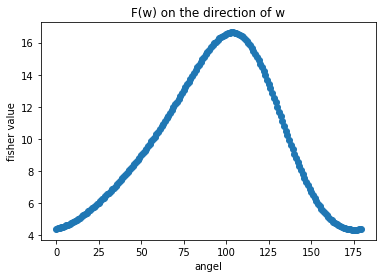

In [312]:
plt.scatter(angle,F_value)
plt.xlabel('angel')
plt.ylabel('fisher value')
plt.title('F(w) on the direction of w')
max_f = max(F_value)
corr_w = angle[F_value.index(max_f)]  # Find the x value corresponding to the maximum y value
w_fish=np.asarray(w(np.radians(corr_w)))
print('In this plot, the maximum fisher value is',max_f,
      '\nThe angle is',corr_w,
      '\nThe corresponding direction w* is', w_fish.flatten())

4.1.2


4.1.2(a)

In [313]:
X_no_same = np.concatenate((class_no_same.a,class_no_same.b), axis = 1)
X_same = np.concatenate((class_same.a,class_same.b), axis = 1)


X_no_same.shape

(2, 3000)

In [314]:
from scipy.stats import multivariate_normal
a1_no_same,a2_no_same=np.mgrid[min(class_no_same.a1):max(class_no_same.a1):1,min(class_no_same.a2):max(class_no_same.a2):1]
b1_no_same,b2_no_same=np.mgrid[min(class_no_same.b1):max(class_no_same.b1):1,min(class_no_same.b2):max(class_no_same.b2):1]
a1_same,a2_same=np.mgrid[min(class_same.a1):max(class_same.a1):1,min(class_same.a2):max(class_same.a2):1]
b1_same,b2_same=np.mgrid[min(class_same.b1):max(class_same.b1):1,min(class_same.b2):max(class_same.b2):1]
pos_no_same=np.empty(a1_no_same.shape+(2,))
pos_no_same[:,:,0]=a1_no_same; pos_no_same[:,:,1]=a2_no_same
a_rv_no_same=multivariate_normal(class_no_same.a_mean,class_no_same.a_cov)
pos1_no_same=np.empty(b1_no_same.shape+(2,))
pos1_no_same[:,:,0]=b1_no_same; pos1_no_same[:,:,1]=b2_no_same
b_rv_no_same=multivariate_normal(class_no_same.b_mean,class_no_same.b_cov)

pos_same=np.empty(a1_same.shape+(2,))
pos_same[:,:,0]=a1_same; pos_same[:,:,1]=a2_same
a_rv_same=multivariate_normal(class_same.a_mean,class_same.a_cov)
pos1_same=np.empty(b1_same.shape+(2,))
pos1_same[:,:,0]=b1_same; pos1_same[:,:,1]=b2_same
b_rv_same=multivariate_normal(class_same.b_mean,class_same.b_cov)

In [315]:
a_mean_no_same=(class_no_same.a_mean).reshape(2,1)
b_mean_no_same=(class_no_same.b_mean).reshape(2,1)
SW_a_no_same=np.dot((class_no_same.a-a_mean_no_same),(class_no_same.a-a_mean_no_same).T)
SW_b_no_same=np.dot((class_no_same.b-b_mean_no_same),(class_no_same.b-b_mean_no_same).T)
SW_no_same=SW_a_no_same+SW_b_no_same
SB_no_same=np.dot((a_mean_no_same-b_mean_no_same),(a_mean_no_same-b_mean_no_same).T)
SW_matrix_no_same=np.matrix(SW_no_same)
SW_inverse_no_same=(SW_matrix_no_same).I
A_no_same=SW_inverse_no_same@SB_no_same
M_no_same=np.array(A_no_same)

a_mean_same=(class_same.a_mean).reshape(2,1)
b_mean_same=(class_same.b_mean).reshape(2,1)
SW_a_same=np.dot((class_same.a-a_mean_same),(class_same.a-a_mean_same).T)
SW_b_same=np.dot((class_same.b-b_mean_same),(class_same.b-b_mean_same).T)
SW_same=SW_a_same+SW_b_same
SB_same=np.dot((a_mean_same-b_mean_same),(a_mean_same-b_mean_same).T)
SW_matrix_same=np.matrix(SW_same)
SW_inverse_same=(SW_matrix_same).I
A_same=SW_inverse_same@SB_same
M_same=np.array(A_same)

In [318]:
from numpy.linalg import matrix_rank
matrix_rank(A_same)

1

In [248]:
from numpy import linalg as LA
w_no_same,v_no_same=LA.eig(M_no_same)
print('if covariance of a is not equal to b ')
print('the eigenvalue is \n',w_no_same)
print('the eighenvector,also the best weight is \n',v_no_same)
w_same,v_same=LA.eig(M_same)
print('\nif covariance of a is equal to b ')
print('the eigenvalue is \n',w_same)
print('the eighenvector,also the best weight is \n',v_same)

if covariance of a is not equal to b 
the eigenvalue is 
 [0.00450629 0.        ]
the eighenvector,also the best weight is 
 [[ 0.98587621  0.37139068]
 [-0.16747565  0.92847669]]

if covariance of a is equal to b 
the eigenvalue is 
 [3.26929129e-02 5.42101086e-20]
the eighenvector,also the best weight is 
 [[ 0.99934274  0.37139068]
 [-0.03625023  0.92847669]]


In [249]:
w_best_no_same=v_no_same[:,0]
w_best_same=v_same[:,0]


print('In the covaraince not equal circumstance:')
print('\nthe best w from the eigen is\n',w_best_no_same,
      '\nthe best w calculated from fisher value is\n',w_fish.flatten())

In the covaraince not equal circumstance:

the best w from the eigen is
 [ 0.98587621 -0.16747565] 
the best w calculated from fisher value is
 [-0.97604964  0.21754792]


/Users/mac/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'color'
  s)


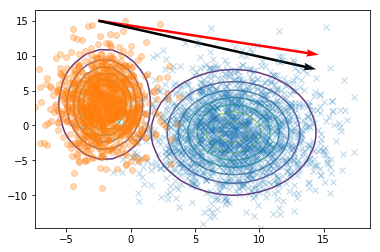

In [250]:
plt.contour(a1_no_same,a2_no_same,a_rv_no_same.pdf(pos_no_same),7,color='black',alpha=0.8)
plt.contour(b1_no_same,b2_no_same,b_rv_no_same.pdf(pos1_no_same),7,color='black',alpha=0.8)
plt.plot(class_no_same.a[0,:],class_no_same.a[1,:],'x',class_no_same.b[0,:],class_no_same.b[1,:],'o',alpha=0.3)
origin = [-2.5], [15]
plt.quiver(*origin, w_best[0], w_best[1], color='red',scale=1.5)
plt.quiver(*origin, -w_fish[0], -w_fish[1], color='black',scale=1.5)

4.1.2(b)

In [280]:
prob_a_no_same=class_no_same.n_a/(class_no_same.n_a+class_no_same.n_b)
prob_b_no_same=class_no_same.n_b/(class_no_same.n_a+class_no_same.n_b)
constant_no_same=np.log(prob_a_no_same/prob_b_no_same)
X_no_same=np.asmatrix(X_no_same)
div_a_no_same=X_no_same-a_mean_no_same
div_b_no_same=X_no_same-b_mean_no_same

prob_a_same=class_same.n_a/(class_same.n_a+class_same.n_b)
prob_b_same=class_same.n_b/(class_same.n_a+class_same.n_b)
constant_same=np.log(prob_a_same/prob_b_same)
X_same=np.asmatrix(X_same)
div_a_same=X_same-a_mean_same
div_b_same=X_same-b_mean_same
div_a_no_same.shape

(2, 3000)

In [281]:
def term(div,i,cov):    
    f=-0.5*np.dot(np.dot(div.T[i],inv(cov)),div.T[i].T)
#     -0.5*np.log(np.linalg.det(cov))
    return f

In [282]:
from numpy.linalg import inv
pi=np.pi
f_a_no_same=(2*pi*np.linalg.det(class_no_same.a_cov))**(-1)
f_b_no_same=(2*pi*np.linalg.det(class_no_same.b_cov))**(-1)

f_a_same=(2*pi*np.linalg.det(class_same.a_cov))**(-1)
f_b_same=(2*pi*np.linalg.det(class_same.b_cov))**(-1)

In [283]:
def logratio(a, b, eps=1e-14): 
    a=a+eps 
    b=b+eps 
    return np.log(a/b)

In [284]:
pp_no_same=[]
for j in range(0,class_no_same.n_a+class_no_same.n_b):
    f_a_exp_no_same=np.exp(term(div_a_no_same,j,class_no_same.a_cov))
    f_b_exp_no_same=np.exp(term(div_b_no_same,j,class_no_same.b_cov))
    fin_a_no_same=f_a_no_same*f_a_exp_no_same*prob_a_no_same
    fin_b_no_same=f_b_no_same*f_b_exp_no_same*prob_b_no_same
    lodds_no_same=logratio(fin_a_no_same,fin_b_no_same, 1e-16)+constant_no_same
    if abs(lodds_no_same)<0.5:
        pp_no_same.extend(X_no_same.T[j])
print(pp_no_same)

[matrix([[1.8890531 , 6.50492377]]), matrix([[ 1.55460134, -0.50124527]]), matrix([[ 0.48833461, -5.24969581]]), matrix([[1.80448039, 2.6877922 ]]), matrix([[2.25154349, 4.93530479]]), matrix([[ 0.4361857 , -4.52339473]]), matrix([[ 0.51155671, -4.0392161 ]]), matrix([[2.24942777, 4.98027343]]), matrix([[2.03313349, 5.23994476]]), matrix([[ 1.23928955, -2.27820696]]), matrix([[ 1.3244875 , -0.89614004]]), matrix([[ 1.33983313, -0.54489383]]), matrix([[1.6016656 , 1.76014869]]), matrix([[1.65419713, 2.80021789]]), matrix([[ 2.48517509, 10.83307433]]), matrix([[1.9326883 , 3.69044676]]), matrix([[ 0.79636666, -4.65172432]]), matrix([[1.70044615, 3.13928196]]), matrix([[ 1.36529707, -0.0238527 ]]), matrix([[1.73692248, 4.94363899]]), matrix([[1.92031774, 1.98554277]]), matrix([[ 1.17258749, -1.6420692 ]]), matrix([[ 1.14732323, -1.76894665]]), matrix([[2.08959674, 5.50244483]]), matrix([[ 0.61989   , -4.74906223]]), matrix([[1.81267227, 4.85925115]]), matrix([[2.18936472, 6.80626674]]), m

In [285]:
pp_same=[]
for j in range(0,class_same.n_a+class_same.n_b):
    f_a_exp_same=np.exp(term(div_a_same,j,class_same.a_cov))
    f_b_exp_same=np.exp(term(div_b_same,j,class_same.b_cov))
    fin_a_same=f_a_same*f_a_exp_same
    fin_b_same=f_b_same*f_b_exp_same
    lodds_same=logratio(fin_a_same,fin_b_same, 1e-16)+constant_same
    if abs(lodds_same)<25:
        pp_same.extend(X_same.T[j])
print(pp_same)

[matrix([[4.48292004, 0.93446361]]), matrix([[5.45783211, 4.11537066]]), matrix([[5.56362044, 6.36971925]]), matrix([[ 5.25330017, -2.36054737]]), matrix([[5.4084255 , 1.05680425]]), matrix([[ 5.16480012, -4.03825185]]), matrix([[5.36109394, 1.50043395]]), matrix([[ 4.81822448, -4.15211707]]), matrix([[5.02993726, 1.88200772]]), matrix([[5.17215067, 2.51253855]]), matrix([[ 4.80851918, -9.45013937]]), matrix([[ 5.00036611, -4.89293321]]), matrix([[4.77430929, 0.06063619]]), matrix([[4.75148499, 1.35184714]]), matrix([[0.65095106, 3.75086055]]), matrix([[ 0.72721297, -0.65005718]]), matrix([[1.2457086, 6.3540493]]), matrix([[0.96147314, 0.88210077]]), matrix([[0.8606583 , 6.16867508]])]


In [286]:
pp_no_same=np.asarray(pp_no_same)
pp_no_same.T[1]

array([[ 6.50492377, -0.50124527, -5.24969581,  2.6877922 ,  4.93530479,
        -4.52339473, -4.0392161 ,  4.98027343,  5.23994476, -2.27820696,
        -0.89614004, -0.54489383,  1.76014869,  2.80021789, 10.83307433,
         3.69044676, -4.65172432,  3.13928196, -0.0238527 ,  4.94363899,
         1.98554277, -1.6420692 , -1.76894665,  5.50244483, -4.74906223,
         4.85925115,  6.80626674, -6.40816809, 14.59983239,  3.79670148,
        -0.37505796, -5.06358009]])

In [287]:
pp_same=np.asarray(pp_same)
pp_same.T[1]

array([[ 0.93446361,  4.11537066,  6.36971925, -2.36054737,  1.05680425,
        -4.03825185,  1.50043395, -4.15211707,  1.88200772,  2.51253855,
        -9.45013937, -4.89293321,  0.06063619,  1.35184714,  3.75086055,
        -0.65005718,  6.3540493 ,  0.88210077,  6.16867508]])

Text(0.5,1,'when covariance of a is not equal to b')

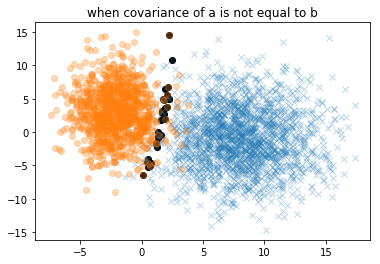

In [288]:
plt.scatter(pp_no_same.T[0],pp_no_same.T[1],color='black',alpha=1)
# plt.contour(a1,a2,a_rv.pdf(pos),7,color='black',alpha=0.8)
# plt.contour(b1,b2,b_rv.pdf(pos1),7,color='black',alpha=0.8)
plt.plot(class_no_same.a[0,:],class_no_same.a[1,:],'x',class_no_same.b[0,:],class_no_same.b[1,:],'o',alpha=0.3)
plt.title('when covariance of a is not equal to b')
# origin = [-2.5], [15]
# plt.quiver(*origin, w_best[0], w_best[1], color='black',scale=1.5)

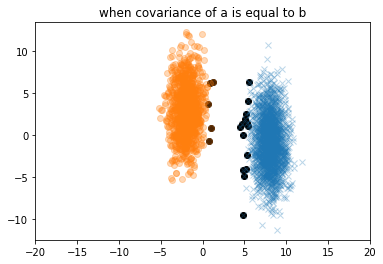

In [275]:
plt.scatter(pp_same.T[0],pp_same.T[1],color='black',alpha=1)
plt.xlim(-20,20)
plt.title('when covariance of a is equal to b')


# plt.contour(a1,a2,a_rv.pdf(pos),7,color='black',alpha=0.8)
# plt.contour(b1,b2,b_rv.pdf(pos1),7,color='black',alpha=0.8)
plt.plot(class_same.a[0,:],class_same.a[1,:],'x',class_same.b[0,:],class_same.b[1,:],'o',alpha=0.3)

4.1.2(c)

In [276]:
def fisher_function1(w,a_num,b_num):
    f=((mu(class_no_same.a,w,a_num)-mu(class_no_same.b,w,b_num))**2)/(var(class_no_same.a,w,a_num)+var(class_no_same.b,w,b_num))
    return f

In [277]:
w_ini=(np.asmatrix(w3_norm)).T
def w(theta):
    return rotation(theta).dot(w_ini)

In [278]:
F_value1=[]
angle1=[]
for k in range(0,180):
    angle1.append(k)
    theta=np.radians(k)
    weight=(np.asarray(w(theta))).flatten()
    F_value1.append(fisher_function1(weight,class_no_same.n_a,class_no_same.n_b))
    print('Angle theta is',k)
    print('Rotation matrix is \n',rotation(theta))
    print('Vector w is',weight)
    print('The fisher value is',fisher_function1(weight,class_no_same.n_a,class_no_same.n_b))

Angle theta is 0
Rotation matrix is 
 [[ 1. -0.]
 [ 0.  1.]]
Vector w is [0.4472136  0.89442719]
The fisher value is 0.030112211666519357
Angle theta is 1
Rotation matrix is 
 [[ 0.9998477  -0.01745241]
 [ 0.01745241  0.9998477 ]]
Vector w is [0.43153558 0.90209592]
The fisher value is 0.019171244935785405
Angle theta is 2
Rotation matrix is 
 [[ 0.99939083 -0.0348995 ]
 [ 0.0348995   0.99939083]]
Vector w is [0.41572611 0.90948986]
The fisher value is 0.01075412434738901
Angle theta is 3
Rotation matrix is 
 [[ 0.99862953 -0.05233596]
 [ 0.05233596  0.99862953]]
Vector w is [0.39979    0.91660676]
The fisher value is 0.004794847558987561
Angle theta is 4
Rotation matrix is 
 [[ 0.99756405 -0.06975647]
 [ 0.06975647  0.99756405]]
Vector w is [0.38373212 0.92344445]
The fisher value is 0.0012305435408988706
Angle theta is 5
Rotation matrix is 
 [[ 0.9961947  -0.08715574]
 [ 0.08715574  0.9961947 ]]
Vector w is [0.36755735 0.93000086]
The fisher value is 1.429185725455396e-06
Angle theta

Angle theta is 55
Rotation matrix is 
 [[ 0.57357644 -0.81915204]
 [ 0.81915204  0.57357644]]
Vector w is [-0.47616068  0.87935829]
The fisher value is 2.310991416744283
Angle theta is 56
Rotation matrix is 
 [[ 0.5591929  -0.82903757]
 [ 0.82903757  0.5591929 ]]
Vector w is [-0.49143508  0.87091421]
The fisher value is 2.4031863070798285
Angle theta is 57
Rotation matrix is 
 [[ 0.54463904 -0.83867057]
 [ 0.83867057  0.54463904]]
Vector w is [-0.50655978  0.86220484]
The fisher value is 2.4973845482357344
Angle theta is 58
Rotation matrix is 
 [[ 0.52991926 -0.8480481 ]
 [ 0.8480481   0.52991926]]
Vector w is [-0.52153018  0.85323284]
The fisher value is 2.593598989932138
Angle theta is 59
Rotation matrix is 
 [[ 0.51503807 -0.8571673 ]
 [ 0.8571673   0.51503807]]
Vector w is [-0.53634171  0.84400093]
The fisher value is 2.691840683838972
Angle theta is 60
Rotation matrix is 
 [[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]
Vector w is [-0.55098987  0.83451193]
The fisher value is 

Angle theta is 104
Rotation matrix is 
 [[-0.2419219  -0.97029573]
 [ 0.97029573 -0.2419219 ]]
Vector w is [-0.97604964  0.21754792]
The fisher value is 7.880199333214546
Angle theta is 105
Rotation matrix is 
 [[-0.25881905 -0.96592583]
 [ 0.96592583 -0.25881905]]
Vector w is [-0.97969772  0.20048037]
The fisher value is 7.91889402868361
Angle theta is 106
Rotation matrix is 
 [[-0.27563736 -0.9612617 ]
 [ 0.9612617  -0.27563736]]
Vector w is [-0.98304737  0.18335175]
The fisher value is 7.947216759170169
Angle theta is 107
Rotation matrix is 
 [[-0.2923717  -0.95630476]
 [ 0.95630476 -0.2923717 ]]
Vector w is [-0.98609758  0.16616729]
The fisher value is 7.964745960961314
Angle theta is 108
Rotation matrix is 
 [[-0.30901699 -0.95105652]
 [ 0.95105652 -0.30901699]]
Vector w is [-0.98884741  0.1489322 ]
The fisher value is 7.971110922036502
Angle theta is 109
Rotation matrix is 
 [[-0.32556815 -0.94551858]
 [ 0.94551858 -0.32556815]]
Vector w is [-0.99129603  0.13165175]
The fisher va

The fisher value is 1.3768633921487443
Angle theta is 156
Rotation matrix is 
 [[-0.91354546 -0.40673664]
 [ 0.40673664 -0.91354546]]
Vector w is [-0.77234626 -0.63520174]
The fisher value is 1.2734189150651094
Angle theta is 157
Rotation matrix is 
 [[-0.92050485 -0.39073113]
 [ 0.39073113 -0.92050485]]
Vector w is [-0.76114283 -0.6485843 ]
The fisher value is 1.1748742458860897
Angle theta is 158
Rotation matrix is 
 [[-0.92718385 -0.37460659]
 [ 0.37460659 -0.92718385]]
Vector w is [-0.74970755 -0.66176929]
The fisher value is 1.0811446358771128
Angle theta is 159
Rotation matrix is 
 [[-0.93358043 -0.35836795]
 [ 0.35836795 -0.93358043]]
Vector w is [-0.7380439 -0.6747527]
The fisher value is 0.9921384608426691
Angle theta is 160
Rotation matrix is 
 [[-0.93969262 -0.34202014]
 [ 0.34202014 -0.93969262]]
Vector w is [-0.72615543 -0.68753057]
The fisher value is 0.9077585543430681
Angle theta is 161
Rotation matrix is 
 [[-0.94551858 -0.32556815]
 [ 0.32556815 -0.94551858]]
Vector w

without class fraction
In this plot, the maximum fisher value is 7.971110922036502 
The angle is 108 
The corresponding direction w* is [-0.98884741  0.1489322 ]


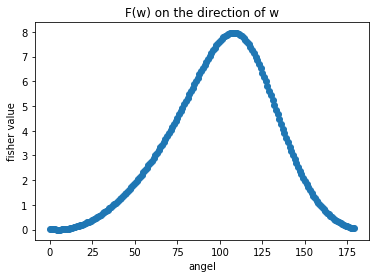

In [279]:
plt.scatter(angle,F_value1)
print('without class fraction')
plt.xlabel('angel')
plt.ylabel('fisher value')
plt.title('F(w) on the direction of w')
max_f1 = max(F_value1)
corr_w1 = angle[F_value1.index(max_f1)]  # Find the x value corresponding to the maximum y value
w_fish1=np.asarray(w(np.radians(corr_w1)))
print('In this plot, the maximum fisher value is',max_f1,
      '\nThe angle is',corr_w1,
      '\nThe corresponding direction w* is', w_fish1.flatten())